Import the Modules

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load the dataset

In [4]:
dataset = pd.read_csv('Grad_Admission_Dataset.csv')
dataset

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


Removing the extra columns

In [5]:
dataset.drop(['Serial No.'] , axis='columns' , inplace=True)

Exploring the dataset

In [6]:
dataset.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [8]:
dataset.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


Data Visualization - Exploring the pairwise correlation of the columns

In [9]:
corr = dataset.corr(method='pearson')
corr.style.background_gradient(cmap='PuBu')

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


We can interpret the above correlation matrix as:

1) The higher the CGPA the higher is the chance of getting an admit

2) The higher the GRE score the higher is the chance of getting an admit


Visualizing correlation between all columns 

1) By constructing pairplot

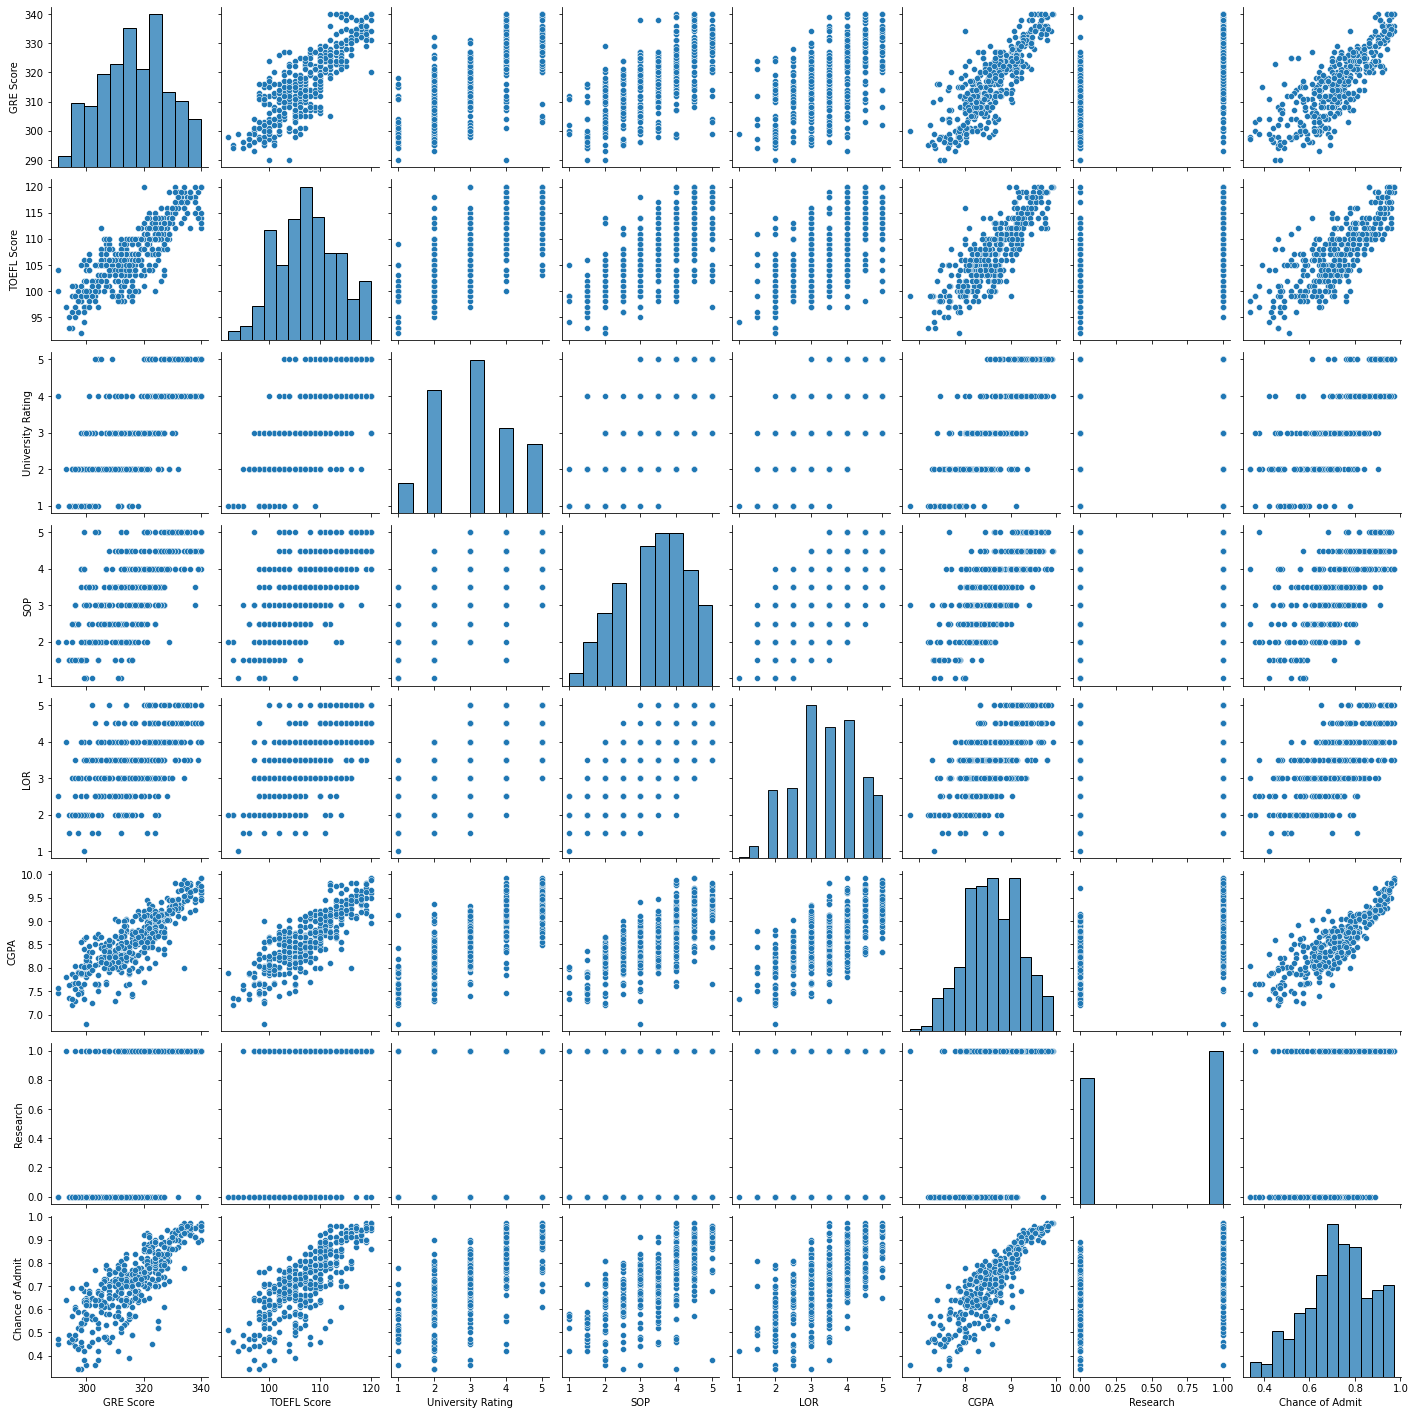

In [10]:
import seaborn as sns
sns.pairplot(dataset)


Applying Machine Learning Algorithms:

1) Multiple Linear Regression

In [11]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

Splitting into training and testing set

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

Training the LinearRegression Model

In [13]:
from sklearn.linear_model import LinearRegression
linearRegression = LinearRegression()
linearRegression.fit(X_train,y_train)

LinearRegression()

Predicting the test set result

In [14]:
y_pred = linearRegression.predict(X_test)
np.set_printoptions(precision=2)

Checking the accuracy with mean absolute error method

In [15]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)*100

4.692893505623998

The mean absolute error is 4.69 percent that means the prediction is more than 95% correct.

2) Random Forest Classifier: We will now implement a classification model

Here we will have to convert the dependent vairable into a binary variable 0 or 1

In [16]:
mean_chance = dataset['Chance of Admit '].mean()
mean_chance

0.7243499999999996

In [17]:
y_train_binary = (y_train > 0.72).astype(int)
y_test_binary = (y_test > 0.72).astype(int)

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
RF_model = RandomForestClassifier(n_estimators=100,max_depth=7,random_state=0)
RF_model.fit(X_train, y_train_binary)


RandomForestClassifier(max_depth=7, random_state=0)

In [20]:
y_predict = RF_model.predict(X_test)
from sklearn.metrics import accuracy_score
RF_model_score = (accuracy_score(y_test_binary, y_predict))*100
RF_model_score

87.5